# Multinomial Naive Bayes Classifier

### Getting the preprocessed data

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/Users/mimita/Documents/repos/SpamFilter/utils.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


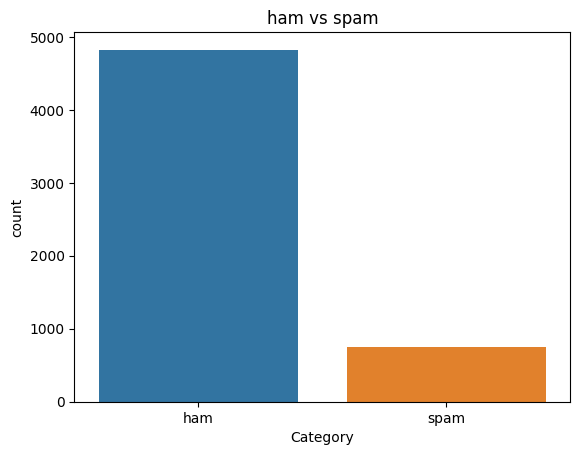

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
X_train: (4456,)


/Users/mimita/Documents/repos/SpamFilter/utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
/Users/mimita/Documents/repos/SpamFilter/utils.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


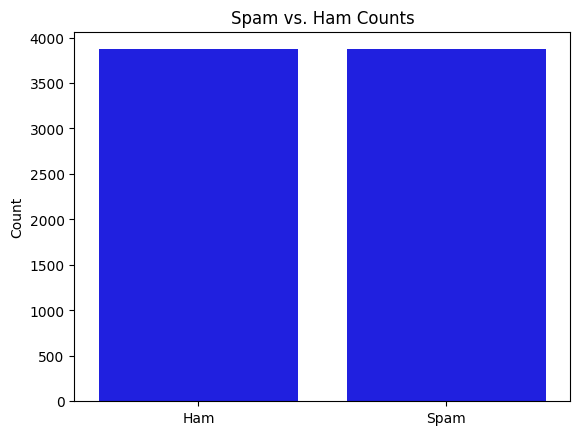

In [8]:
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data();

### Creating and training the base model

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Define the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(X_train, y_train)

# Test the model
y_pred = mnb.predict(X_test)

### Getting the results (scores) from our predictions

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       953
           1       0.42      0.58      0.49       162

    accuracy                           0.82      1115
   macro avg       0.67      0.72      0.69      1115
weighted avg       0.85      0.82      0.83      1115
 

Accuracy Score: 0.8224215246636771


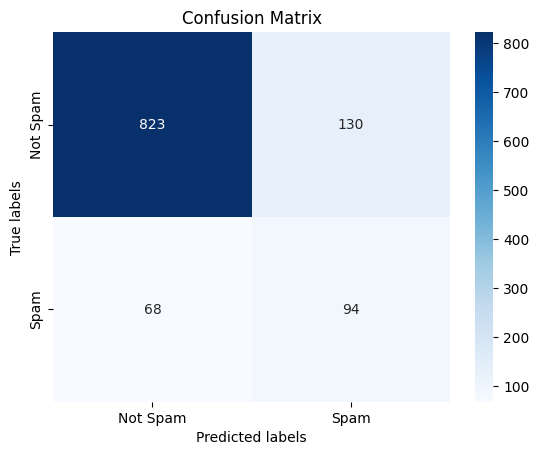

In [10]:
generate_model_output(y_test, y_pred)

### Cross-validation using GridSearchCV to Make Better Predictions

#### Finding the Best Parameters

In [11]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters that we want to tune
param_grid = {
    "alpha": [0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
    "fit_prior": [True, False]
}

# Create a GridSearchCV object to perform cross validation over the hyperparameters
grid_search = GridSearchCV(mnb, param_grid)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("GridSearchCV best params: ", grid_search.best_params_, "\n")

GridSearchCV best params:  {'alpha': 0.05, 'fit_prior': False} 



#### Creating New Multinomial Naive Bayes Model with GridSearchCV Best Params

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       953
           1       0.42      0.58      0.49       162

    accuracy                           0.82      1115
   macro avg       0.67      0.72      0.69      1115
weighted avg       0.85      0.82      0.83      1115
 

Accuracy Score: 0.8224215246636771


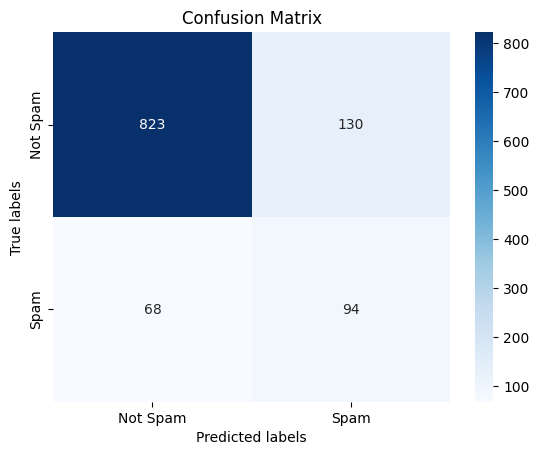

In [12]:
# Create a new MultinomialNB model with the best hyperparameters
best_model_grid_search = MultinomialNB(alpha=grid_search.best_params_["alpha"], fit_prior=grid_search.best_params_["fit_prior"])

# Fit the new model to the training data
best_model_grid_search.fit(X_train, y_train)

# Evaluating the model
generate_model_output(y_test, y_pred)

### Cross-validation using RandomSearchCV to Make Better Predictions

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters that we want to tune
param_distributions = {
    "alpha": [0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
    "fit_prior": [True, False]
}

# Create a RandomSearchCV object to perform cross validation over the hyperparameters
randomized_search = RandomizedSearchCV(mnb, param_distributions)

# Fit the RandomSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by RandomSearchCV
print("RandomizedSearchCV best params: ", randomized_search.best_params_, "\n")

RandomizedSearchCV best params:  {'fit_prior': False, 'alpha': 0.2} 



#### Creating New Multinomial Naive Bayes Model with RandomizedSearchCV Best Params

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       953
           1       0.42      0.58      0.49       162

    accuracy                           0.82      1115
   macro avg       0.67      0.72      0.69      1115
weighted avg       0.85      0.82      0.83      1115
 

Accuracy Score: 0.8224215246636771


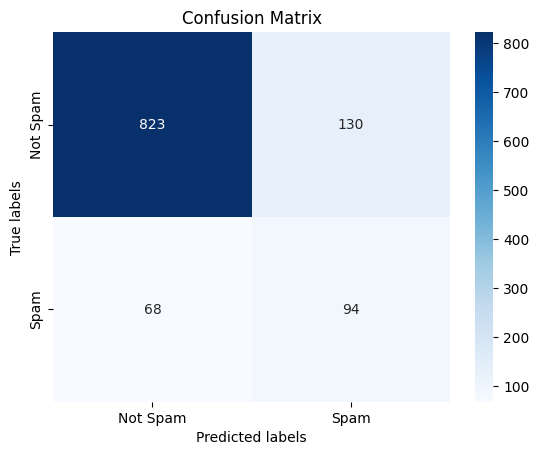

In [14]:
# Create a new MultinomialNB model with the best hyperparameters
best_model_random_search = MultinomialNB(alpha=randomized_search.best_params_["alpha"], fit_prior=randomized_search.best_params_["fit_prior"])

# Fit the new model to the training data
best_model_random_search.fit(X_train, y_train)

# Evaluating the model
generate_model_output(y_test, y_pred)